<a href="https://colab.research.google.com/github/Smrt-Sanskar/CS671/blob/main/Perceptron_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Group03.zip

Archive:  /content/drive/MyDrive/Group03.zip
replace Group03/Classification/Image_Group03/test/botanical_garden/sun_aaestfykdspfjxqz.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aaestfykdspfjxqz.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aajgmzsvuhejexcq.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_aaqfmkvdwukffrst.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_acbeefkxpymwevpk.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_acghfkorvlqvksjz.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_ackdwnmnaehpqggg.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_ackzydggopidfvhd.jpg  
  inflating: Group03/Classification/Image_Group03/test/botanical_garden/sun_acuexwlypmvysydi.jpg  
  inflating: Group03/Classific

In [ ]:
class Perceptron: 
    def __init__(self, dim, epoch):
        self.dim = dim
        self.wts = np.random.rand(dim + 1)
        self.epoch = epoch
        self.average_error = []
    
    def train(self, x, y):
        temp = np.ones(shape = (x.shape[0], 1))
        x = np.concatenate([x, temp], axis = 1)
        e = 0
        for i in range(self.epoch): 
            j = random.randint(0, len(x) - 1)
            sample_x = x[j]
            sample_y = y[j]
            sample_out = np.dot(sample_x, self.wts)
            self.wts += 0.0001 * (sample_y - sample_out)
            e += (sample_y - sample_out) * (sample_y - sample_out)
        return e / self.epoch    

    def test(self, x):
        temp = np.ones(shape = (x.shape[0], 1))
        x = np.concatenate([x, temp], axis = 1)
        y = np.dot(x, self.wts)
        return y

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
data1 = pd.read_csv('Group03/Regression/UnivariateData/3.csv', header = None)
data2 = pd.read_csv('Group03/Regression/BivariateData/3.csv', header = None)

In [ ]:
n = len(data1)
m = len(data2)
train1x = data1[0 : int(0.6 * n)][0]
train1y = data1[0 : int(0.6 * n)][1]
val1x = data1[int(0.6 * n) : int(0.8 * n)][0]
val1y = data1[int(0.6 * n) : int(0.8 * n)][1]
test1x = data1[int(0.8 * n) : n][0]
test1y = data1[int(0.8 * n) : n][1]

Text(0, 0.5, 'y')

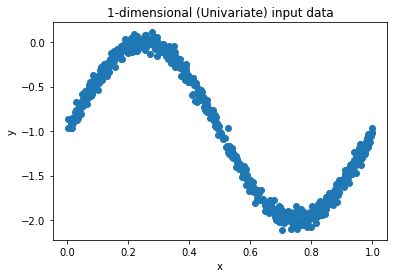

In [ ]:
plt.scatter(train1x, train1y)
plt.title("1-dimensional (Univariate) input data")
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
train1x = np.array(train1x).reshape(train1x.shape[0], 1)
train1y = np.array(train1y).reshape(train1y.shape[0], 1)
val1x = np.array(val1x)
val1y = np.array(val1y)
test1x = np.array(test1x)
test1y = np.array(test1y)
model = Perceptron(dim = 1, epoch = 1000)

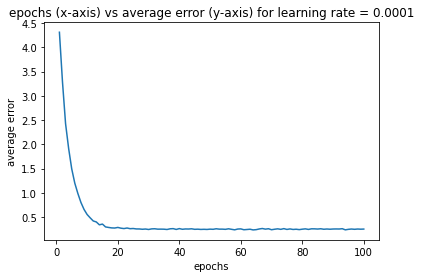

In [ ]:
average_error = []
epoch = []
for i in range(1,101):
  e = model.train(train1x, train1y)
  average_error.append(e)
  epoch.append(i)
plt.title("epochs (x-axis) vs average error (y-axis) for learning rate = 0.0001")
plt.xlabel("epochs")
plt.ylabel("average error")
plt.plot(epoch, average_error)  

0.2516917313009723


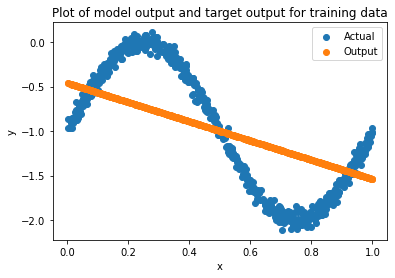

In [ ]:
output1 = []
for i in train1x:
  j = np.array(i).reshape(1, 1)
  output1.append(model.test(j))
print(np.average((train1y - output1) ** 2))
plt.scatter(train1x, train1y, label="Actual")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(train1x, output1, label="Output")
plt.title("Plot of model output and target output for training data")
plt.legend()

0.5842622352930983


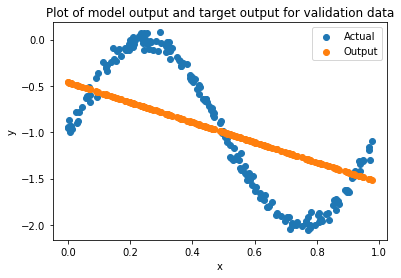

In [ ]:
output2 = []
for i in val1x:
  j = np.array(i).reshape(1, 1)
  output2.append(model.test(j))
print(np.average((val1y - output2) ** 2))  
plt.scatter(val1x, val1y, label="Actual")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(val1x, output2, label="Output")
plt.title("Plot of model output and target output for validation data")
plt.legend()

0.6016183198117607


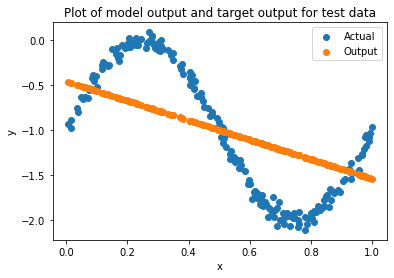

In [ ]:
output3 = []
for i in test1x:
  j = np.array(i).reshape(1, 1)
  output3.append(model.test(j))
print(np.average((test1y - output3) ** 2))    
plt.scatter(test1x, test1y, label="Actual")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(test1x, output3, label="Output")
plt.title("Plot of model output and target output for test data")
plt.legend()

Text(0.5, 1.0, 'Plot of target output (x-axis) vs model output (y-axis) on training data.')

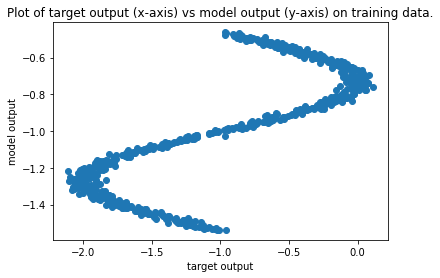

In [ ]:
plt.scatter(train1y, output1)
plt.xlabel("target output")
plt.ylabel("model output")
plt.title("Plot of target output (x-axis) vs model output (y-axis) on training data.")

Text(0.5, 1.0, 'Plot of target output (x-axis) vs model output (y-axis) on validation data.')

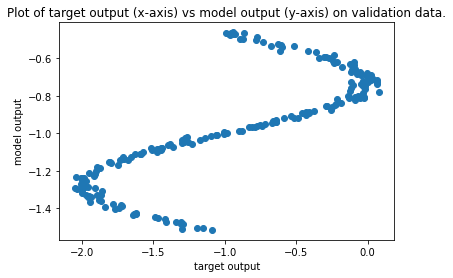

In [ ]:
plt.scatter(val1y, output2)
plt.xlabel("target output")
plt.ylabel("model output")
plt.title("Plot of target output (x-axis) vs model output (y-axis) on validation data.")

Text(0.5, 1.0, 'Plot of target output (x-axis) vs model output (y-axis) on test data.')

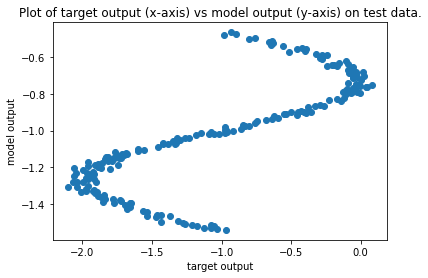

In [ ]:
plt.scatter(test1y, output3)
plt.xlabel("target output")
plt.ylabel("model output")
plt.title("Plot of target output (x-axis) vs model output (y-axis) on test data.")

In [ ]:
train2x = data2[0 : int(0.6 * m)][0]
train2y = data2[0 : int(0.6 * m)][1]
train2z = data2[0 : int(0.6 * m)][2]
val2x = data2[int(0.6 * m) : int(0.8 * m)][0]
val2y = data2[int(0.6 * m) : int(0.8 * m)][1]
val2z = data2[int(0.6 * m) : int(0.8 * m)][2]
test2x = data2[int(0.8 * m) : m][0]
test2y = data2[int(0.8 * m) : m][1]
test2z = data2[int(0.8 * m) : m][2]

Text(0.5, 0.92, '2-dimensional (Bivariate) input data')

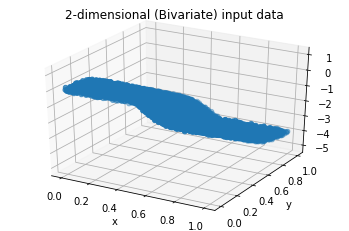

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(train2x, train2y, train2z, cmap='Greens');
plt.xlabel('x')
plt.ylabel('y')
plt.title('2-dimensional (Bivariate) input data')

In [ ]:
train2x = np.array(train2x).reshape(train2x.shape[0], 1)
train2y = np.array(train2y).reshape(train2y.shape[0], 1)
train2z = np.array(train2z).reshape(train2z.shape[0], 1)
val2x = np.array(val2x)
val2y = np.array(val2y)
val2z = np.array(val2z)
test2x = np.array(test2x)
test2y = np.array(test2y)
test2z = np.array(test2z)
model = Perceptron(dim = 2, epoch = 1000)

Text(0, 0.5, 'average error')

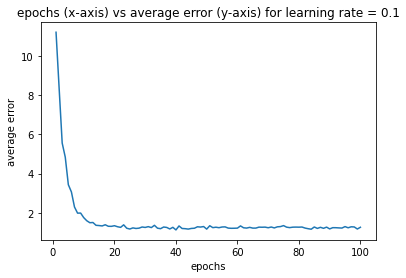

In [ ]:
average_error = []
epoch = []
for i in range(1,101):
  e = model.train(np.concatenate([train2x, train2y], axis = 1), train2z)
  average_error.append(e)
  epoch.append(i)
plt.plot(epoch, average_error) 
plt.title("epochs (x-axis) vs average error (y-axis) for learning rate = 0.1")
plt.xlabel("epochs")
plt.ylabel("average error")

1.25563569281325


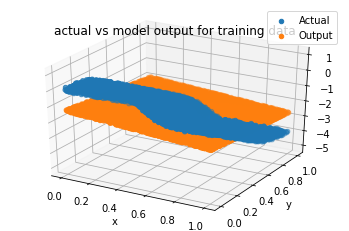

In [ ]:
output1 = []
for i in range(len(train2x)):
  j = np.array([train2x[i], train2y[i]]).reshape(1, 2)
  output1.append(model.test(j))
print(np.average((train2z-output1)**2))  
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(train2x, train2y, train2z, cmap='red', label="Actual");
plt.xlabel('x')
plt.ylabel('y')
ax.scatter3D(train2x, train2y, output1, cmap='green', label="Output");
plt.title('2-dimensional (Bivariate) input data')  
plt.title("actual vs model output for training data")
plt.legend()

1.957505969132914


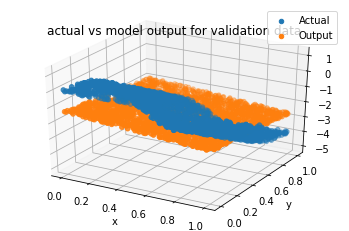

In [ ]:
output2 = []
for i in range(len(val2x)):
  j = np.array([val2x[i], val2y[i]]).reshape(1, 2)
  output2.append(model.test(j))
print(np.average((val2z-output2)**2))    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(val2x, val2y, val2z, cmap='red', label="Actual");
plt.xlabel('x')
plt.ylabel('y')
ax.scatter3D(val2x, val2y, output2, cmap='green', label="Output");
plt.title('2-dimensional (Bivariate) input data')  
plt.title("actual vs model output for validation data")
plt.legend()

1.9281812111704923


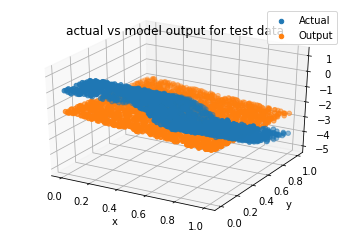

In [ ]:
output3 = []
for i in range(len(test2x)):
  j = np.array([test2x[i], test2y[i]]).reshape(1, 2)
  output3.append(model.test(j))
print(np.average((test2z-output3)**2))  
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(test2x, test2y, test2z, cmap='red', label="Actual");
plt.xlabel('x')
plt.ylabel('y')
ax.scatter3D(test2x, test2y, output3, cmap='green', label="Output");
plt.title('2-dimensional (Bivariate) input data')  
plt.title("actual vs model output for test data")
plt.legend()

Text(0.5, 1.0, 'Plot of target output (x-axis) vs model output (y-axis) on training data.')

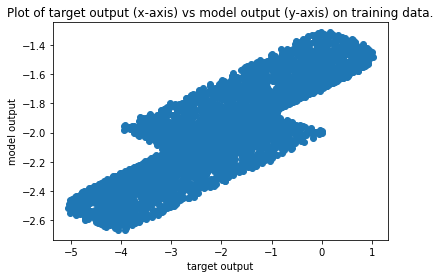

In [ ]:
plt.scatter(train2z, output1)
plt.xlabel("target output")
plt.ylabel("model output")
plt.title("Plot of target output (x-axis) vs model output (y-axis) on training data.")

Text(0.5, 1.0, 'Plot of target output (x-axis) vs model output (y-axis) on validation data.')

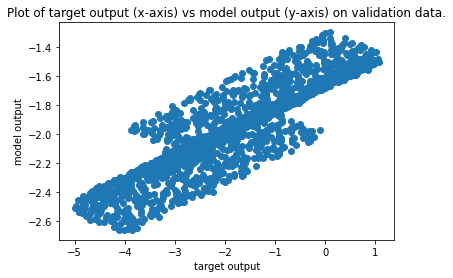

In [ ]:
plt.scatter(val2z, output2)
plt.xlabel("target output")
plt.ylabel("model output")
plt.title("Plot of target output (x-axis) vs model output (y-axis) on validation data.")

Text(0.5, 1.0, 'Plot of target output (x-axis) vs model output (y-axis) on test data.')

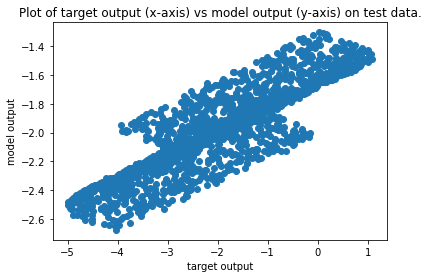

In [ ]:
plt.scatter(test2z, output3)
plt.xlabel("target output")
plt.ylabel("model output")
plt.title("Plot of target output (x-axis) vs model output (y-axis) on test data.")